In [1]:
from PIL import Image
from numpy import asarray
from sklearn.metrics import accuracy_score
import numpy as np
import glob
import cv2
import  os
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy
import random
import torch
from torchvision.utils import make_grid
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


C:\Users\merva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\merva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


# **Loading and Processing ORL Dataset**


### **Converting each image into a vector of 10304 values**


In [2]:
def show_random_samples(directory, num_samples, grid_cols):
    image_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".pgm"):
                image_paths.append(os.path.join(root, file))

    random_samples = random.sample(image_paths, num_samples)

    grid_rows = (num_samples + grid_cols - 1) // grid_cols
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(9, 5))

    for i, sample_path in enumerate(random_samples):
        row = i // grid_cols
        col = i % grid_cols

        image = plt.imread(sample_path)
        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)
    #plt.tight_layout(pad=0)
    plt.show()




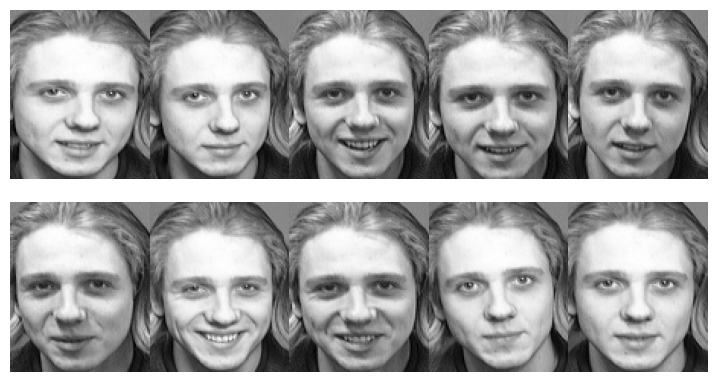

In [3]:

dataset_directory = "C:/Users/merva/OneDrive/Desktop/uni/data mining/att_faces/s12"
num_samples = 10
grid_cols = 5

show_random_samples(dataset_directory, num_samples, grid_cols)

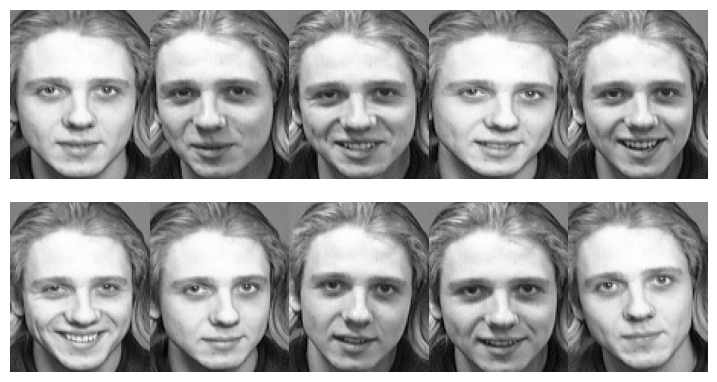

In [4]:
#dataset_directory = "att_faces/s5"
num_samples = 10
grid_cols = 5
show_random_samples(dataset_directory, num_samples, grid_cols)

In [32]:
#saving data set in Data_matrix
y = [] #Label Vector y
D = [] #Data Matrix D
for i in range(1, 41):
  folder = f"C:/Users/merva/OneDrive/Desktop/uni/data mining/att_faces/s{i}"
  #folder = f"att_faces/s{i}"
   #open file path
  # files = glob.glob (folder) # gets file from folder s(i)
  # for j in range(1,11): 
  files = glob.glob(folder + "/*.pgm")  # gets all pgm files from folder s(i)
  for file_name in files:
      #file_name = folder + "/"+str(j)+".pgm"
      img = Image.open(file_name)
      data = np.array(img)     #could replace these two lines with plt.imread(file_name)
      #print(data)
      img2vec = data.flatten()
      D.append(img2vec)
      y.append(i)
      print(img2vec.shape)
  #     j=j+1
  # j = 1
 

(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(

In [33]:
Data_matrix = np.array(D)
print("Total data:")
print(Data_matrix.shape)
print(Data_matrix)

print("Labels:")
print(len(y))


Total data:
(400, 10304)
[[ 48  49  45 ...  47  46  46]
 [ 34  34  33 ...  37  40  33]
 [ 60  60  62 ...  32  34  34]
 ...
 [129 127 133 ...  93  93  93]
 [125 119 124 ...  36  39  40]
 [119 120 120 ...  89  94  85]]
Labels:
400


### **Train-Test Split**


In [ ]:
# Splitting the data into training and testing sets
training_matrix = Data_matrix[::3]  # Pick every 3rd sample for training
training_matrix = np.vstack((training_matrix, Data_matrix[1::3]))  # Stack next 3rd sample
testing_matrix = Data_matrix[2::3]  # Every 3rd image is for testing

# Splitting labels accordingly
training_labels = []
testing_labels_main = []

# for i in range(1, 41):  # 40 classes
#     class_labels = [i] * 10  # Create a list of 10 labels for this subject

#     training_labels.extend(class_labels[:7])  # First 7 images for training
#     testing_labels_main.extend(class_labels[7:])  # Last 3 images for testing

# Convert to numpy arrays
training_labels = np.array(training_labels)
testing_labels_main = np.array(testing_labels_main)

# Print results
print(f"Total Training Samples: {training_matrix.shape[0]}")  # 267
print(f"Total Training Labels: {training_labels.shape[0]}")   # 267
print(f"Total Testing Samples: {testing_matrix.shape[0]}")    # 133
print(f"Total Testing Labels: {testing_labels_main.shape[0]}") # 133


Total Training Samples: 267
Total Training Labels: 280
Total Testing Samples: 133
Total Testing Labels: 120


In [34]:

y = np.array(y)
#splitting the data into 2 sets by 2/3
training_matrix = Data_matrix[::3]  # pick every 3rd sample for training
training_matrix = np.vstack((training_matrix, Data_matrix[1::3]))  # Stack next 3rd sample
testing_matrix = Data_matrix[2::3]

#Splitting labels accordingly
training_labels = []
testing_labels_main= []

# for i in range(1,41):
#   for j in range(1,11):
#     if j % 3 == 2 or j % 3 == 1:  # first 2 imgs go to training
#       training_labels.append(i)
#     else:  #3rd img is to test
#       testing_labels_main.append(i)

# Splitting labels using the same indexing as data
training_labels = np.hstack((y[::3], y[1::3]))  # Select corresponding labels
testing_labels_main = y[2::3]  # Select every 3rd label for testing

print("Training Labels:")
training_labels = np.array(training_labels)
testing_labels_main = np.array(testing_labels_main)
print(training_labels)

print(f"Total data Samples: {Data_matrix.shape[0]}")
print(f"Total Training Samples: {training_matrix.shape[0]}")
print(f"Total Training Labels: {len(training_labels)}")
print(f"Total Testing Samples: {testing_matrix.shape[0]}")    # 133
print(f"Total Testing Labels: {testing_labels_main.shape[0]}") 

Training Labels:
[ 1  1  1  1  2  2  2  3  3  3  4  4  4  4  5  5  5  6  6  6  7  7  7  7
  8  8  8  9  9  9 10 10 10 10 11 11 11 12 12 12 13 13 13 13 14 14 14 15
 15 15 16 16 16 16 17 17 17 18 18 18 19 19 19 19 20 20 20 21 21 21 22 22
 22 22 23 23 23 24 24 24 25 25 25 25 26 26 26 27 27 27 28 28 28 28 29 29
 29 30 30 30 31 31 31 31 32 32 32 33 33 33 34 34 34 34 35 35 35 36 36 36
 37 37 37 37 38 38 38 39 39 39 40 40 40 40  1  1  1  2  2  2  2  3  3  3
  4  4  4  5  5  5  5  6  6  6  7  7  7  8  8  8  8  9  9  9 10 10 10 11
 11 11 11 12 12 12 13 13 13 14 14 14 14 15 15 15 16 16 16 17 17 17 17 18
 18 18 19 19 19 20 20 20 20 21 21 21 22 22 22 23 23 23 23 24 24 24 25 25
 25 26 26 26 26 27 27 27 28 28 28 29 29 29 29 30 30 30 31 31 31 32 32 32
 32 33 33 33 34 34 34 35 35 35 35 36 36 36 37 37 37 38 38 38 38 39 39 39
 40 40 40]
Total data Samples: 400
Total Training Samples: 267
Total Training Labels: 267
Total Testing Samples: 133
Total Testing Labels: 133


# **Building PCA Model**


**To build the PCA Model we need to follow the following algorithm:**\
1- Calculate the mean matrix \
2- Center the data \
3- Compute the covariance matrix \
4- Compute the eigen values \
5- Compute the eigen vectors \
6- Find the fraction of total variance \
7- Choose the dimensionality \
8- Find the reduced basis \
9- Finally, get the reduced dimensionality data  

In [35]:
def PCA (training_data, testing_data, alpha):
    # calculate the mean matrix
    training_data = np.array(training_data)
    mean_matrix = training_data.mean(axis=0)
    print (mean_matrix)
    
    #centre the data
    centered_data = training_data - mean_matrix
    #Calculating the covariance matrix
    covariance_matrix = np.cov(centered_data,rowvar=False) #cenetred_data.T is the transpose of centered_data matrix (Z^T)
    
    #Computing the eigen values and vectors
    eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)
    
    #Finding the fraction of total variance
    sum_eigen_values = eigen_values.sum()
    i = np.argsort(eigen_values)[::-1]
    sorted_eigen_values = eigen_values[i]
    
    sorted_eigen_vectors = eigen_vectors[:,i]
    fractional_sum = 0
    fractional_variance = 0
    r = 0
    
    for i in range(0, len(sorted_eigen_values)):
        fractional_sum += sorted_eigen_values[i]
        fractional_variance = fractional_sum / sum_eigen_values
        #choose the dimensionality
        if fractional_variance >= alpha:  
            r = i 
            break
     
    print('Fractional Variance: ', fractional_variance)
    print('r = ', r+1)
        
    #Reduced basis
    reduced_eigen_vectors = sorted_eigen_vectors[:,0:r+1]
    reduced_eigen_values = sorted_eigen_values[0:r+1]

    #Reduced dimensionality data
    projected_training = np.dot(centered_data, reduced_eigen_vectors)

    #Test projecting
    #mean_testing_matrix = np.array(testing_data).mean(axis=0)
    centered_testing_data = np.array(testing_data - mean_matrix) #subtract training mean in testing not testing mean
    projected_testing=np.dot(centered_testing_data, reduced_eigen_vectors)
 
    return projected_training, projected_testing, reduced_eigen_vectors, reduced_eigen_values, sorted_eigen_values

    
    

Visualising cumulative explained variance 

In [36]:
def plot_cumulative_variance(eigen_values):
    total_variance = np.sum(eigen_values)
    cumulative_variance = np.cumsum(eigen_values) / total_variance

    plt.figure(figsize=(8,5))
    plt.plot(range(1, len(eigen_values) + 1), cumulative_variance, marker='o', linestyle='-')
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance vs. Number of Principal Components')
    plt.legend()
    plt.grid(True)
    plt.show()


In [37]:
alpha = 0.95
projected_train, projected_test, eigenvectors, eigenvalues, sorted_eigen_values = PCA(training_matrix, testing_matrix, alpha)



[86.61423221 86.39325843 86.66292135 ... 77.45692884 75.93632959
 75.3258427 ]
Fractional Variance:  0.9501269975101745
r =  142


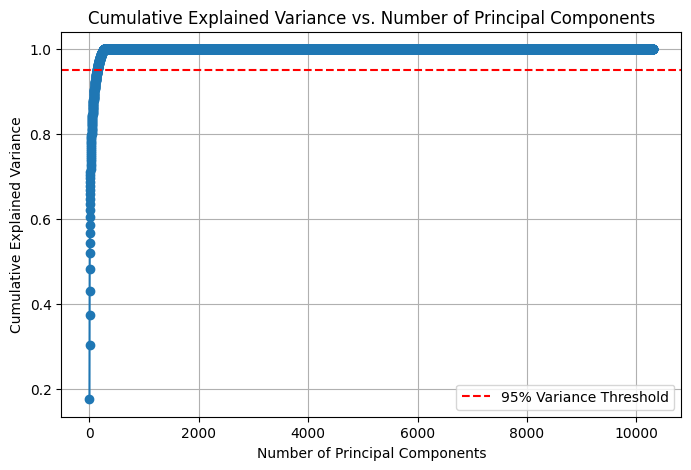

In [38]:
# Plot cumulative variance
plot_cumulative_variance(sorted_eigen_values)

In [39]:
# k-NN classifier function
def predict_labels_knn(k, projected_training, projected_testing, training_labels):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(projected_training, np.array(training_labels))
    predicted_labels = model.predict(projected_testing)
    return predicted_labels

In [40]:
# Evaluation function
def evaluate_model(predicted_labels, actual_labels):
    print("\nClassification Report:")
    print(classification_report(actual_labels, predicted_labels))

    print("\nAccuracy:", accuracy_score(actual_labels, predicted_labels))

    # Confusion Matrix
    cm = confusion_matrix(actual_labels, predicted_labels)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_labels), yticklabels=np.unique(actual_labels))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.75      1.00      0.86         3
           3       0.67      1.00      0.80         4
           4       0.75      1.00      0.86         3
           5       0.50      0.67      0.57         3
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
   

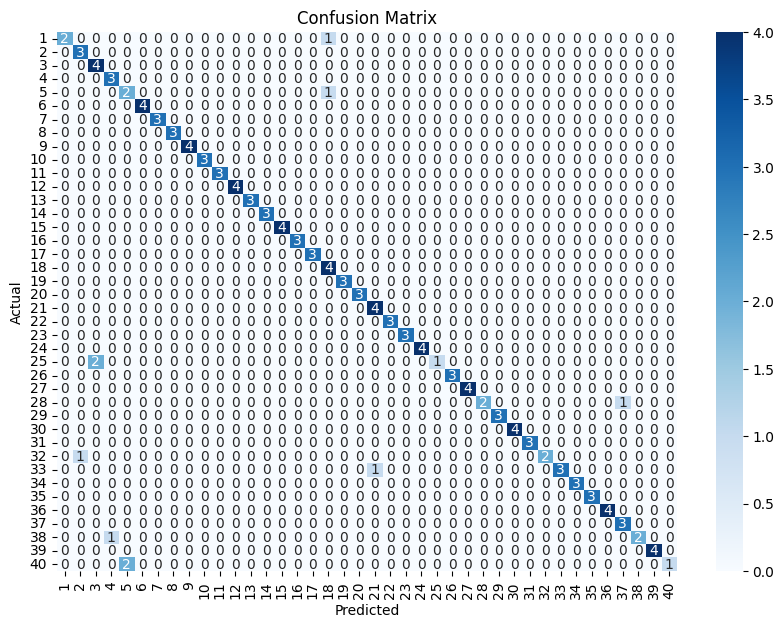

In [41]:
k= 3
# Classify using k-NN
predicted_labels = predict_labels_knn(k, projected_train, projected_test, training_labels)

# Evaluate performance
evaluate_model(predicted_labels, testing_labels_main)

**Experiments using equal train-test split**

In [ ]:
#splitting the data into 2 sets equally
testing_matrix =  Data_matrix[::2] 
training_matrix = Data_matrix[1::2]

#Splitting labels accordingly
training_labels = []
testing_labels_main= []

for i in range(1,41):
  for j in range(1,6):
    training_labels.append(i)
    testing_labels_main.append(i)

In [10]:
print('For alpha = 0.8')
projected_training_08, projected_testing_08, reduced_eigen_vectors_bonus_08, reduced_eigenvalues_bonus_08 = PCA(training_matrix, testing_matrix, 0.8)

For alpha = 0.8
[85.12  84.89  85.165 ... 77.24  74.335 73.37 ]
Fractional Variance:  0.8029455554165241
r =  37


In [11]:
print('For alpha = 0.85')
projected_training_85, projected_testing_85, reduced_eigen_vectors_85, reduced_eigen_values_85 = PCA(training_matrix,testing_matrix,0.85)

For alpha = 0.85
[85.12  84.89  85.165 ... 77.24  74.335 73.37 ]
Fractional Variance:  0.852311337550504
r =  53


In [12]:
print('For alpha = 0.9')
projected_training_09, projected_testing_09, reduced_eigen_vectors_09, reduced_eigen_values_09 = PCA(training_matrix,testing_matrix,0.9)

For alpha = 0.9
[85.12  84.89  85.165 ... 77.24  74.335 73.37 ]
Fractional Variance:  0.9007600309473768
r =  77


In [9]:
print('For alpha = 0.95')
projected_training_95, projected_testing_95, reduced_eigen_vectors_95, reduced__eigen_values_95 = PCA(training_matrix,testing_matrix,0.95)

For alpha = 0.95
[85.12  84.89  85.165 ... 77.24  74.335 73.37 ]
Fractional Variance:  0.9500861567347989
r =  116


In [13]:
PCA_predicted_labels_08 = []
PCA_predicted_labels_85 = []
PCA_predicted_labels_09 = []
PCA_predicted_labels_95 = []

PCA_accuracy_08 = []
PCA_accuracy_85 = []
PCA_accuracy_09 = []
PCA_accuracy_95 = []

In [14]:
#output of predicted labels
print("test labels for alpha 0.8 = ")
labels_test_08 = predict_labels_knn ( 1, projected_training_08, projected_testing_08)
print(labels_test_08)

PCA_predicted_labels_08.append(labels_test_08)

print("\n \n")

print("test labels for alpha 0.85 = ")
labels_test_85 = predict_labels_knn (1, projected_training_85, projected_testing_85)
print(labels_test_85)

PCA_predicted_labels_85.append(labels_test_85)

print("\n \n")

print("test labels for alpha 0.9 = ")
labels_test_09 = predict_labels_knn (1, projected_training_09, projected_testing_09)
print(labels_test_09)

PCA_predicted_labels_09.append(labels_test_09)

print("\n \n")

print("test labels for alpha 0.95 = ")
labels_test_95 = predict_labels_knn (1, projected_training_95, projected_testing_95)
print(labels_test_95)

PCA_predicted_labels_95.append(labels_test_95)

test labels for alpha 0.8 = 
[16  2  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 38 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 36 20
 20  3 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 28 28 29 29 29 29
 29 30 30 30 30 30 31 31 31 21 31 32 32 32  2 32 33 33 33 33 33 34 34 34
 34 34 40 15 35 35 35  7 36  7 36 36 37 37 37 37 37 38 38 38 38 38 39 39
 39 39 39 40 40  5  5  5]

 

test labels for alpha 0.85 = 
[16  2  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 38 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 36 20
 20  3 20 20 21 21 21 21 21 22 22 2

In [15]:
accuracy_08 = accuracy_score(testing_labels_main, labels_test_08)
PCA_accuracy_08.append([1, accuracy_08])

accuracy_85 = accuracy_score(testing_labels_main, labels_test_85)
PCA_accuracy_85.append([1, accuracy_85])

accuracy_09 = accuracy_score(testing_labels_main, labels_test_09)
PCA_accuracy_09.append([1, accuracy_09])

accuracy_95= accuracy_score(testing_labels_main, labels_test_95)
PCA_accuracy_95.append([1, accuracy_95])

In [16]:
import seaborn as sns

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

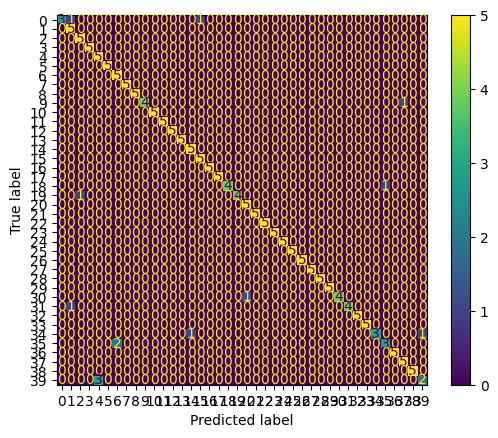

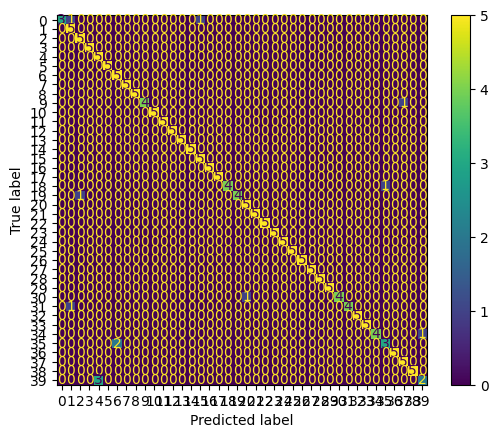

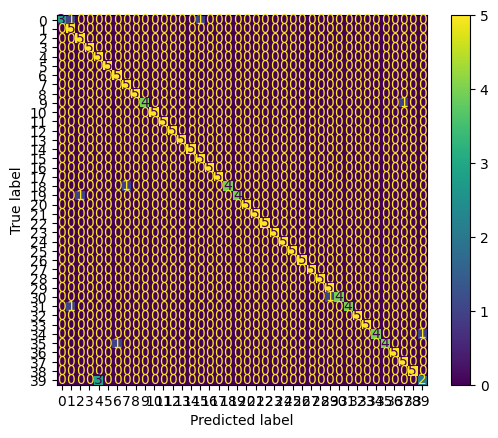

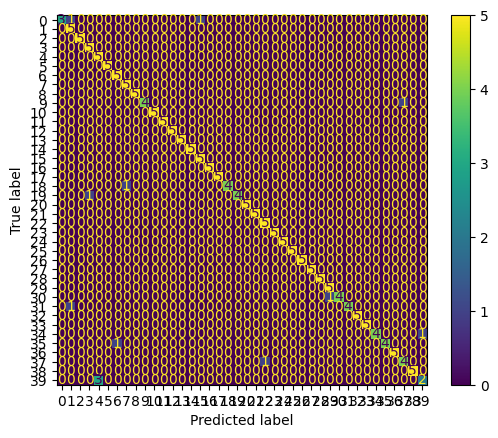

For alpha = 0.8:
F1: 0.9273115773115773, Recall: 0.93, Precision: 0.9409226190476191
For alpha = 0.85:
F1: 0.9330565268065268, Recall: 0.935, Precision: 0.9450892857142857
For alpha = 0.9:
F1: 0.9382332944832945, Recall: 0.94, Precision: 0.9501488095238096
For alpha = 0.95:
F1: 0.9332332944832945, Recall: 0.935, Precision: 0.9451488095238096


In [18]:
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f1_08 = f1_score(testing_labels_main, labels_test_08, average='weighted')  
recall_08 = recall_score(testing_labels_main, labels_test_08, average='weighted')
precision_08 = precision_score(testing_labels_main, labels_test_08, average='weighted')
cm_08 = confusion_matrix(testing_labels_main, labels_test_08)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm_08)
matrix.plot()
plt.show()

f1_85 = f1_score(testing_labels_main, labels_test_85, average='weighted')
recall_85 = recall_score(testing_labels_main, labels_test_85, average='weighted')
precision_85 = precision_score(testing_labels_main, labels_test_85, average='weighted')
cm_85 = confusion_matrix(testing_labels_main, labels_test_85)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm_85)
matrix.plot()
plt.show()

f1_09 = f1_score(testing_labels_main, labels_test_09, average='weighted')
recall_09 = recall_score(testing_labels_main, labels_test_09, average='weighted')
precision_09 = precision_score(testing_labels_main, labels_test_09, average='weighted')
cm_09 = confusion_matrix(testing_labels_main, labels_test_09)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm_09)
matrix.plot()
plt.show()

f1_95 = f1_score(testing_labels_main, labels_test_95, average='weighted')
recall_95 = recall_score(testing_labels_main, labels_test_95, average='weighted')
precision_95 = precision_score(testing_labels_main, labels_test_95, average='weighted')
cm_95 = confusion_matrix(testing_labels_main, labels_test_95)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm_95)
matrix.plot()
plt.show()

print("For alpha = 0.8:")
print(f"F1: {f1_08}, Recall: {recall_08}, Precision: {precision_08}")

print("For alpha = 0.85:")
print(f"F1: {f1_85}, Recall: {recall_85}, Precision: {precision_85}")

print("For alpha = 0.9:")
print(f"F1: {f1_09}, Recall: {recall_09}, Precision: {precision_09}")

print("For alpha = 0.95:")
print(f"F1: {f1_95}, Recall: {recall_95}, Precision: {precision_95}")

In [19]:
from prettytable import PrettyTable
 
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Alpha", "Accuracy (%)"])
 
# Add rows
myTable.add_row(["0.8", accuracy_08 * 100 ])
myTable.add_row(["0.85", accuracy_85 * 100])
myTable.add_row(["0.9", accuracy_09 * 100])
myTable.add_row(["0.95", accuracy_95 * 100])
 
print(myTable)

+-------+--------------+
| Alpha | Accuracy (%) |
+-------+--------------+
|  0.8  |     93.0     |
|  0.85 |     93.5     |
|  0.9  |     94.0     |
|  0.95 |     93.5     |
+-------+--------------+


### Showing a random sample of failures 

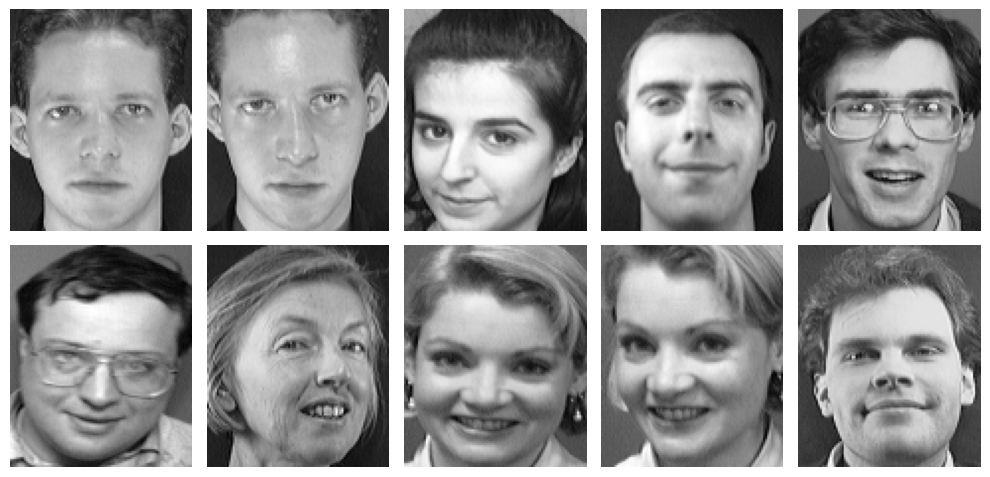

In [20]:
#Failure cases when Alpha = 0.8

# Select the first 10 failure cases
failure_indices = [i for i in range(len(labels_test_08)) if labels_test_08[i] != testing_labels_main[i]][:10]

num_images = len(failure_indices)
num_cols = 5  # Number of columns in the grid
num_rows = int(np.ceil(num_images / num_cols))  # Number of rows in the grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

for i, index in enumerate(failure_indices):
    data1 = testing_matrix[index].reshape(112, 92)
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    ax.imshow(data1, cmap='gray')
    ax.axis('off')

# Remove any unused subplots ----> because this made a problem by displaying empty images!
if num_images < num_rows * num_cols:
    for i in range(num_images, num_rows * num_cols):
        row_index = i // num_cols
        col_index = i % num_cols
        ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

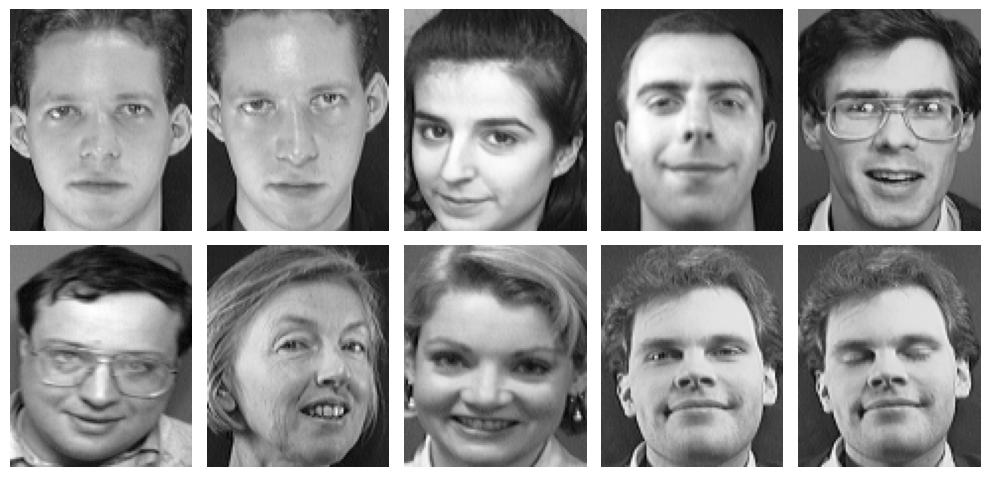

In [21]:
#Failure cases when Alpha = 0.85

# Select the first 10 failure cases
failure_indices = [i for i in range(len(labels_test_85)) if labels_test_85[i] != testing_labels_main[i]][:10]

num_images = len(failure_indices)
num_cols = 5  # Number of columns in the grid
num_rows = int(np.ceil(num_images / num_cols))  # Number of rows in the grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

for i, index in enumerate(failure_indices):
    data1 = testing_matrix[index].reshape(112, 92)
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    ax.imshow(data1, cmap='gray')
    ax.axis('off')

# Remove any unused subplots ----> because this made a problem by displaying empty images!
if num_images < num_rows * num_cols:
    for i in range(num_images, num_rows * num_cols):
        row_index = i // num_cols
        col_index = i % num_cols
        ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

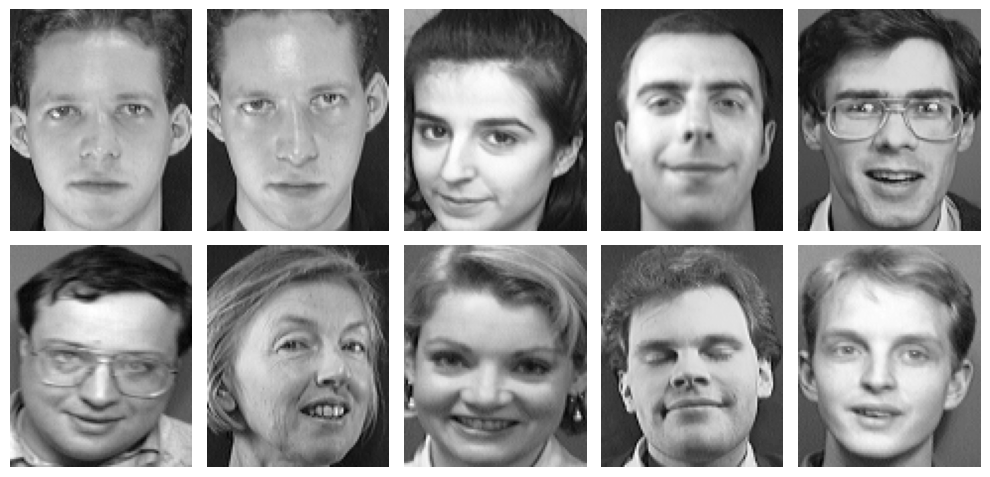

In [22]:
#Failure cases when Alpha = 0.9

# Select the first 10 failure cases
failure_indices = [i for i in range(len(labels_test_09)) if labels_test_09[i] != testing_labels_main[i]][:10]

num_images = len(failure_indices)
num_cols = 5  # Number of columns in the grid
num_rows = int(np.ceil(num_images / num_cols))  # Number of rows in the grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

for i, index in enumerate(failure_indices):
    data1 = testing_matrix[index].reshape(112, 92)
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    ax.imshow(data1, cmap='gray')
    ax.axis('off')

# Remove any unused subplots ----> because this made a problem by displaying empty images!
if num_images < num_rows * num_cols:
    for i in range(num_images, num_rows * num_cols):
        row_index = i // num_cols
        col_index = i % num_cols
        ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

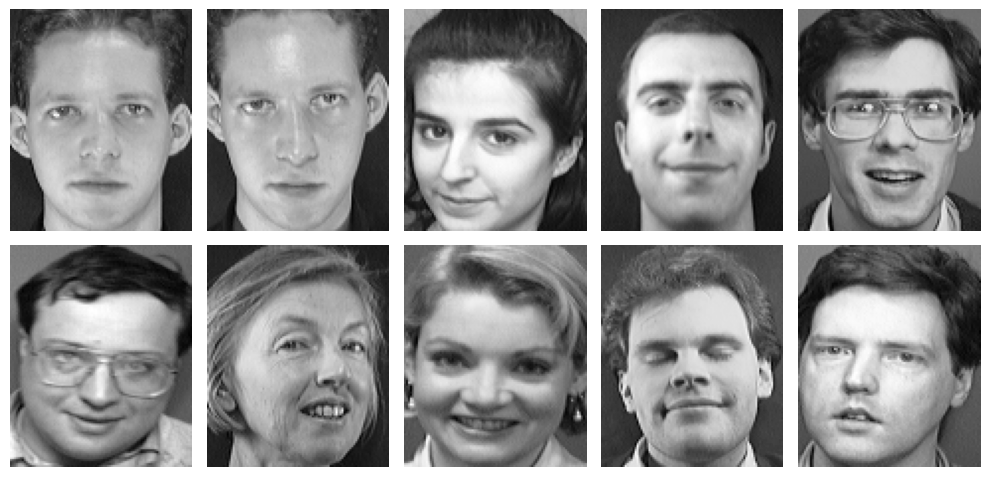

In [23]:
#Failure cases when Alpha = 0.95

# Select the first 10 failure cases
failure_indices = [i for i in range(len(labels_test_95)) if labels_test_95[i] != testing_labels_main[i]][:10]

num_images = len(failure_indices)
num_cols = 5  # Number of columns in the grid
num_rows = int(np.ceil(num_images / num_cols))  # Number of rows in the grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

for i, index in enumerate(failure_indices):
    data1 = testing_matrix[index].reshape(112, 92)
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    ax.imshow(data1, cmap='gray')
    ax.axis('off')

# Remove any unused subplots ----> because this made a problem by displaying empty images!
if num_images < num_rows * num_cols:
    for i in range(num_images, num_rows * num_cols):
        row_index = i // num_cols
        col_index = i % num_cols
        ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

## **Applying Different values for k**

In [24]:
PCA_f1_08 = []
PCA_f1_85 = []
PCA_f1_09 = []
PCA_f1_95 = []

PCA_precision_08 = []
PCA_precision_85 = []
PCA_precision_09 = []
PCA_precision_95 = []

PCA_recall_08 = []
PCA_recall_85 = []
PCA_recall_09 = []
PCA_recall_95 = []

PCA_cm_08 = []
PCA_cm_85 = []
PCA_cm_09 = []
PCA_cm_95 = []

In [29]:
k = [3, 5, 7, 9]
for i in range(0, 4):
    PCA_predicted_labels_08.append(predict_labels_knn(k[i], projected_training_08, projected_testing_08))
    PCA_predicted_labels_85.append(predict_labels_knn(k[i], projected_training_85, projected_testing_85))
    PCA_predicted_labels_09.append(predict_labels_knn(k[i], projected_training_09, projected_testing_09))
    PCA_predicted_labels_95.append(predict_labels_knn(k[i], projected_training_95, projected_testing_95))

for i in range(0, 4):
    PCA_accuracy_08.append([k[i],accuracy_score(testing_labels_main, PCA_predicted_labels_08[i])])
    PCA_accuracy_85.append([k[i],accuracy_score(testing_labels_main, PCA_predicted_labels_85[i])])
    PCA_accuracy_09.append([k[i],accuracy_score(testing_labels_main, PCA_predicted_labels_09[i])])
    PCA_accuracy_95.append([k[i],accuracy_score(testing_labels_main, PCA_predicted_labels_95[i])])
    
for i in range(0, 4):
    PCA_f1_08.append([k[i],f1_score(testing_labels_main, PCA_predicted_labels_08[i], average='weighted')])
    PCA_f1_85.append([k[i],f1_score(testing_labels_main, PCA_predicted_labels_85[i], average='weighted')])
    PCA_f1_09.append([k[i],f1_score(testing_labels_main, PCA_predicted_labels_09[i], average='weighted')])
    PCA_f1_95.append([k[i],f1_score(testing_labels_main, PCA_predicted_labels_95[i], average='weighted')])

for i in range(0, 4):
    PCA_precision_08.append([k[i],precision_score(testing_labels_main, PCA_predicted_labels_08[i], average='weighted')])
    PCA_precision_85.append([k[i],precision_score(testing_labels_main, PCA_predicted_labels_85[i], average='weighted')])
    PCA_precision_09.append([k[i],precision_score(testing_labels_main, PCA_predicted_labels_09[i], average='weighted')])
    PCA_precision_95.append([k[i],precision_score(testing_labels_main, PCA_predicted_labels_95[i], average='weighted')])

for i in range(0, 4):
    PCA_recall_08.append([k[i],recall_score(testing_labels_main, PCA_predicted_labels_08[i], average='weighted')])
    PCA_recall_85.append([k[i],recall_score(testing_labels_main, PCA_predicted_labels_85[i], average='weighted')])
    PCA_recall_09.append([k[i],recall_score(testing_labels_main, PCA_predicted_labels_09[i], average='weighted')])
    PCA_recall_95.append([k[i],recall_score(testing_labels_main, PCA_predicted_labels_95[i], average='weighted')])

for i in range(0, 4):
    PCA_cm_08.append([k[i],confusion_matrix(testing_labels_main, PCA_predicted_labels_08[i])])
    PCA_cm_85.append([k[i],confusion_matrix(testing_labels_main, PCA_predicted_labels_85[i])])
    PCA_cm_09.append([k[i],confusion_matrix(testing_labels_main, PCA_predicted_labels_09[i])])
    PCA_cm_95.append([k[i],confusion_matrix(testing_labels_main, PCA_predicted_labels_95[i])])


c:\Users\KimoStore\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KimoStore\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KimoStore\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [24]:
PCA_accuracy_08

[[1, 0.93], [3, 0.93], [5, 0.85], [7, 0.82], [9, 0.78]]

For alpha = 0.8

+---+--------------+--------------------+--------------------+--------+
| k | Accuracy (%) |         F1         |     Precision      | Recall |
+---+--------------+--------------------+--------------------+--------+
| 1 |     93.0     | 0.9273115773115773 | 0.9409226190476191 |  0.93  |
| 3 |     93.0     | 0.8433297258297259 | 0.8813392857142859 |  0.85  |
| 5 |     85.0     | 0.8031138306138307 | 0.8605952380952381 |  0.82  |
| 7 |     82.0     | 0.752179070929071  | 0.8072420634920635 |  0.78  |
| 9 |     78.0     | 0.9273115773115773 | 0.9409226190476191 |  0.93  |
+---+--------------+--------------------+--------------------+--------+


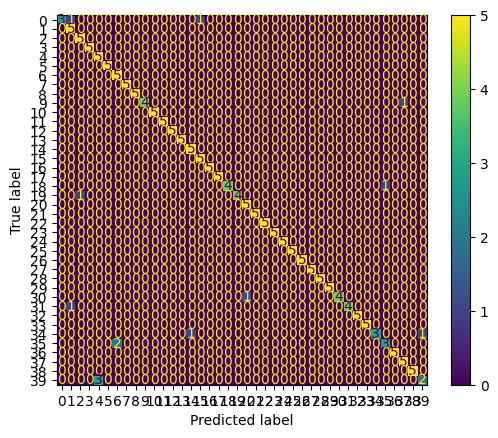

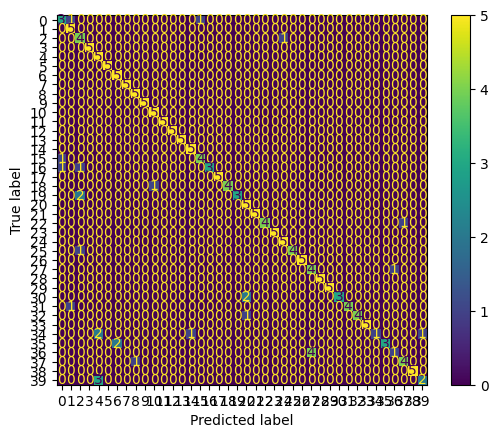

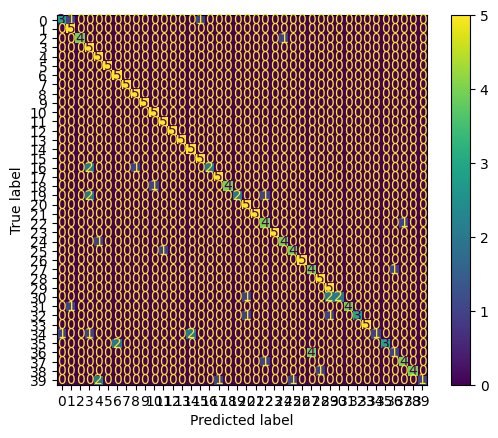

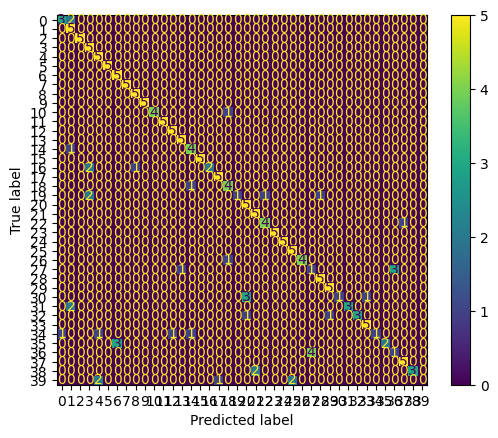

In [32]:
myTable = PrettyTable(["k", "Accuracy (%)", "F1", "Precision", "Recall"])
print("For alpha = 0.8\n")

myTable.add_row([PCA_accuracy_08[0][0],  PCA_accuracy_08[0][1] * 100, PCA_f1_08[0][1], PCA_precision_08[0][1], PCA_recall_08[0][1]])
myTable.add_row([PCA_accuracy_08[1][0],  PCA_accuracy_08[1][1] * 100, PCA_f1_08[1][1], PCA_precision_08[1][1], PCA_recall_08[1][1]])
myTable.add_row([PCA_accuracy_08[2][0],  PCA_accuracy_08[2][1] * 100, PCA_f1_08[2][1], PCA_precision_08[2][1], PCA_recall_08[2][1]])
myTable.add_row([PCA_accuracy_08[3][0],  PCA_accuracy_08[3][1] * 100, PCA_f1_08[3][1], PCA_precision_08[3][1], PCA_recall_08[3][1]])
myTable.add_row([PCA_accuracy_08[4][0],  PCA_accuracy_08[4][1] * 100, PCA_f1_08[4][1], PCA_precision_08[4][1], PCA_recall_08[4][1]]) 
print(myTable)

for i in range(len(k)): 
    matrix = ConfusionMatrixDisplay(confusion_matrix=PCA_cm_08[i][1])
    matrix.plot()
    plt.show()

For alpha = 0.95

+---+--------------+--------------------+--------------------+--------+
| k | Accuracy (%) |         F1         |     Precision      | Recall |
+---+--------------+--------------------+--------------------+--------+
| 1 |     93.5     | 0.9332332944832945 | 0.9451488095238096 | 0.935  |
| 3 |     93.5     | 0.8397394272394272 | 0.8812996031746032 |  0.85  |
| 5 |     85.0     | 0.7975714563214563 | 0.8650099206349207 |  0.81  |
| 7 |     81.0     | 0.6945469807969809 | 0.7637843406593408 |  0.73  |
| 9 |     73.0     | 0.9332332944832945 | 0.9451488095238096 | 0.935  |
+---+--------------+--------------------+--------------------+--------+


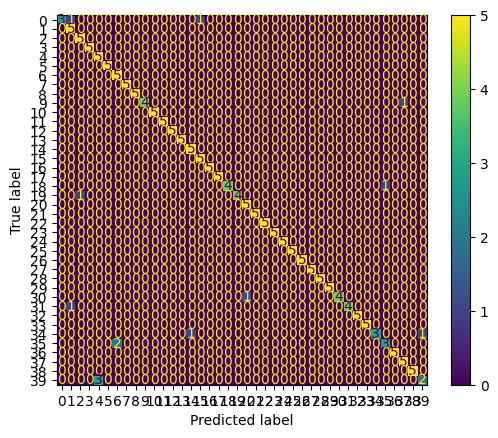

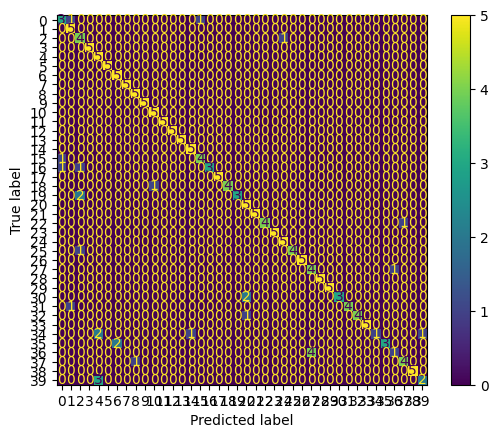

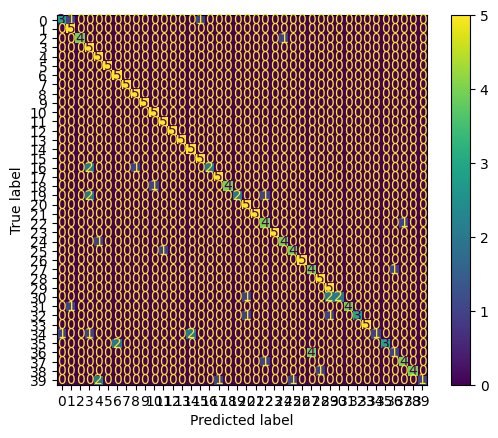

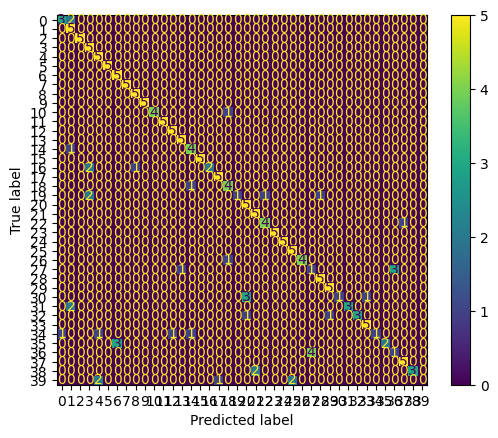

In [33]:
myTable = PrettyTable(["k", "Accuracy (%)", "F1", "Precision", "Recall"])
print("For alpha = 0.95\n")
 
myTable.add_row([PCA_accuracy_95[0][0],  PCA_accuracy_95[0][1] * 100, PCA_f1_95[0][1], PCA_precision_95[0][1], PCA_recall_95[0][1]])
myTable.add_row([PCA_accuracy_95[1][0],  PCA_accuracy_95[1][1] * 100, PCA_f1_95[1][1], PCA_precision_95[1][1], PCA_recall_95[1][1]])
myTable.add_row([PCA_accuracy_95[2][0],  PCA_accuracy_95[2][1] * 100, PCA_f1_95[2][1], PCA_precision_95[2][1], PCA_recall_95[2][1]])
myTable.add_row([PCA_accuracy_95[3][0],  PCA_accuracy_95[3][1] * 100, PCA_f1_95[3][1], PCA_precision_95[3][1], PCA_recall_95[3][1]])
myTable.add_row([PCA_accuracy_95[4][0],  PCA_accuracy_95[4][1] * 100, PCA_f1_95[4][1], PCA_precision_95[4][1], PCA_recall_95[4][1]])
 
print(myTable)

for i in range(len(k)): 
    matrix = ConfusionMatrixDisplay(confusion_matrix=PCA_cm_95[i][1])
    matrix.plot()
    plt.show()

# **Classification without PCA**

Choosing for k = 3 

              precision    recall  f1-score   support

           1       0.60      0.60      0.60         5
           2       0.83      1.00      0.91         5
           3       0.57      0.80      0.67         5
           4       0.83      1.00      0.91         5
           5       0.56      1.00      0.71         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       0.83      1.00      0.91         5
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.83      1.00      0.91         5
          16       0.80      0.80      0.80         5
          17       1.00      0.60      0.75         5
          18       1.00    

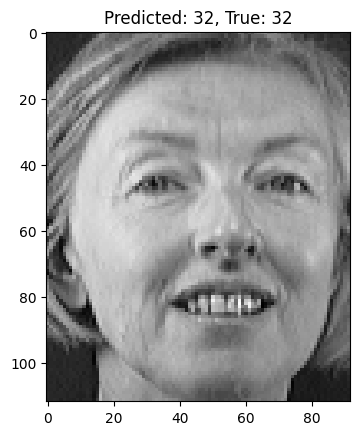

In [37]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(training_matrix, training_labels)

preds = knn.predict(testing_matrix)
print(classification_report(testing_labels_main, preds))

sample_idx = np.random.randint(0, len(testing_matrix))
sample_img = testing_matrix[sample_idx].reshape(112, 92)  
plt.imshow(sample_img, cmap='gray')
plt.title(f"Predicted: {preds[sample_idx]}, True: {testing_labels_main[sample_idx]}")
plt.show()

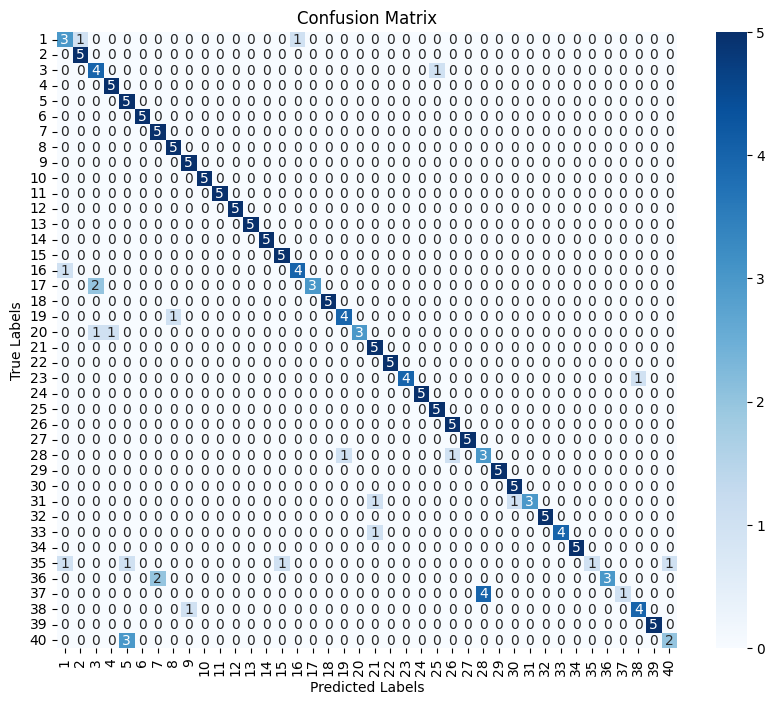

In [40]:
cm = confusion_matrix(testing_labels_main, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()